# 0. Installations

#### Install Anaconda: https://docs.anaconda.com/anaconda/install/index.html
#### Install Scikit-Learn: https://scikit-learn.org/stable/install.html
#### Install TensorFlow: https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/
#### Install Keras: https://anaconda.org/conda-forge/keras
#### Install PyTorch: https://pytorch.org/get-started/locally/

# 1. Step functions

The step function starts at -5.0 and ends at 5.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


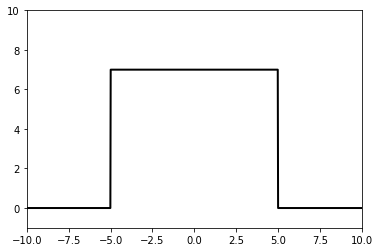

In [7]:
# The user can modify the values of the weight w
# as well as bias_value_1 and bias_value_2 to observe
# how this plots to different step functions

import matplotlib.pyplot as plt
import numpy
weight_value = 1000

# modify to change where the step function starts
bias_value_1 = 5000

# modify to change where the step function ends
bias_value_2 = -5000

# plot the
plt.axis([-10, 10, -1, 10])

print("The step function starts at {0} and ends at {1}".format(-bias_value_1 / weight_value,-bias_value_2 / weight_value))

inputs = numpy.arange(-10, 10, 0.01)
outputs = list()

# iterate over a range of inputs
for x in inputs:
    y1 = 1.0 / (1.0 + numpy.exp(-weight_value * x - bias_value_1))
    y2 = 1.0 / (1.0 + numpy.exp(-weight_value * x - bias_value_2))

    # modify to change the height of the step function
    w = 7
    
    # network output
    y = y1 * w - y2 * w
    
    outputs.append(y)
    
plt.plot(inputs, outputs, lw=2, color='black')
plt.show()

# 2. Introduction to Pytorch

#### Install Pytorch
#### https://pytorch.org/get-started/locally/
#### conda install pytorch torchvision torchaudio cpuonly -c pytorch
#### conda list

## 2.1 Load data, Define network and Train

In [8]:
import pandas as pd

# Load iris dataset
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=['sepal_length', 'sepal_width','petal_length', 'petal_width', 'species'])
dataset['species'] = pd.Categorical(dataset['species']).codes
dataset = dataset.sample(frac=1, random_state=1234)
train_input = dataset.values[:120, :4]
train_target = dataset.values[:120, 4]
test_input = dataset.values[120:, :4]
test_target = dataset.values[120:, 4]



import torch

torch.manual_seed(1234)

hidden_units = 5

net = torch.nn.Sequential(
    torch.nn.Linear(4, hidden_units),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_units, 3)
)

# choose optimizer and loss function
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1,momentum=0.9)

# train
epochs = 50
for epoch in range(epochs):
    inputs = torch.autograd.Variable(torch.Tensor(train_input).float())
    targets = torch.autograd.Variable(torch.Tensor(train_target).long())
    optimizer.zero_grad()
    out = net(inputs)
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()

    if epoch == 0 or (epoch + 1) % 10 == 0:
        print('Epoch %d Loss: %.4f' % (epoch + 1, loss.item()))

Epoch 1 Loss: 1.2181
Epoch 10 Loss: 0.6745
Epoch 20 Loss: 0.2447
Epoch 30 Loss: 0.1397
Epoch 40 Loss: 0.1001
Epoch 50 Loss: 0.0855


## 2.2 Evaluation AI model

In [9]:
import numpy as np

inputs = torch.autograd.Variable(torch.Tensor(test_input).float())
targets = torch.autograd.Variable(torch.Tensor(test_target).long())

optimizer.zero_grad()
out = net(inputs)

_, predicted = torch.max(out.data, 1)

error_count = test_target.size - np.count_nonzero((targets ==
predicted).numpy())
print('Errors: %d; Accuracy: %d%%' % (error_count, 100 *
torch.sum(targets == predicted) / test_target.size))

Errors: 0; Accuracy: 100%


# 3. Code example of a neutal network for the XOR problem (from scratch)

epochs: 0.0
[0 0] -0.789809330553227
[0 1] -0.5985826347686792
[1 0] -0.7217115607681227
[1 1] -0.553217555806774
epochs: 1.0
[0 0] 0.2217695144707291
[0 1] 0.9770924499086757
[1 0] 0.9764013010128652
[1 1] 0.16107071131553452
epochs: 2.0
[0 0] -0.10837184739553091
[0 1] 0.9897778383798748
[1 0] 0.9878431866969571
[1 1] 0.05766723921508235
epochs: 3.0
[0 0] -0.11104153187902152
[0 1] 0.9943950387120195
[1 0] 0.9935372495195232
[1 1] 0.01950995307757293
epochs: 4.0
[0 0] 0.06392438762841787
[0 1] 0.9967437669167742
[1 0] 0.9964259973647991
[1 1] 0.041940468617965604
epochs: 5.0
[0 0] -0.08135871441117389
[0 1] 0.9972575872459903
[1 0] 0.9970172545584643
[1 1] 0.040052401244448366
epochs: 6.0
[0 0] -0.10060851081040989
[0 1] 0.9977168739719956
[1 0] 0.9974832241993286
[1 1] -0.026554678991115604
epochs: 7.0
[0 0] 0.015044747253018343
[0 1] 0.9982708198130805
[1 0] 0.9981182215526846
[1 1] -0.032445737055253755
epochs: 8.0
[0 0] 0.04914763118273799
[0 1] 0.9986619178299292
[1 0] 0.9984994

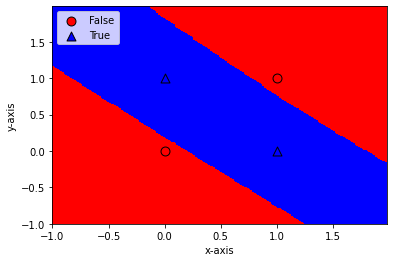

In [10]:
import matplotlib.pyplot as plt
import numpy
from matplotlib.colors import ListedColormap


def tanh(x):
    return (1.0 - numpy.exp(-2 * x)) / (1.0 + numpy.exp(-2 * x))


def tanh_derivative(x):
    return (1 + tanh(x)) * (1 - tanh(x))


class NeuralNetwork:
    # net_arch consists of a list of integers, indicating
    # the number of neurons in each layer
    def __init__(self, net_arch):
        self.activation_func = tanh
        self.activation_derivative = tanh_derivative
        self.layers = len(net_arch)
        self.steps_per_epoch = 1000
        self.net_arch = net_arch

#         print('net_arch',net_arch)
        
        # initialize the weights with random values in the range (-1,1)
        self.weights = []
        for layer in range(len(net_arch) - 1):
            w = 2 * numpy.random.rand(net_arch[layer] + 1, net_arch[layer + 1]) - 1
            self.weights.append(w)

    def fit(self, data, labels, learning_rate=0.1, epochs=10):
        """
        :param data: data is the set of all possible pairs of booleans
                     True or False indicated by the integers 1 or 0
                     labels is the result of the logical operation 'xor'
                     on each of those input pairs

        :param labels: array of 0/1 for each datum
        """

#         print('self.weights')
#         print(self.weights)
#         print('len(self.weights)',len(self.weights))
#         print('')

        # Add bias units to the input layer
        ones = numpy.ones((1, data.shape[0]))
        Z = numpy.concatenate((ones.T, data), axis=1)
        training = epochs * self.steps_per_epoch
        
        for k in range(training):
            if k % self.steps_per_epoch == 0:
                print('epochs: {}'.format(k / self.steps_per_epoch))
                for s in data:
                    print(s, nn.predict(s))

            sample = numpy.random.randint(data.shape[0])
            y = [Z[sample]]
#             print('***************')
#             print(y)

            for i in range(len(self.weights) - 1):
                activation = numpy.dot(y[i], self.weights[i])
                activation_f = self.activation_func(activation)
                
                # add the bias for the next layer
                activation_f = numpy.concatenate((numpy.ones(1), numpy.array(activation_f)))
                y.append(activation_f)

#             print('**')
#             print(y)
#             print(len(y))

            # last layer
            activation = numpy.dot(y[-1], self.weights[-1])
            activation_f = self.activation_func(activation)
            y.append(activation_f)

#             print('***')
#             print(y)
#             print(len(y))
            
            # error for the output layer
            error = labels[sample] - y[-1]
            delta_vec = [error * self.activation_derivative(y[-1])]

            # we need to begin from the back from the next to last layer
            for i in range(self.layers - 2, 0, -1):
                error = delta_vec[-1].dot(self.weights[i][1:].T)
                error = error * self.activation_derivative(y[i][1:])
                delta_vec.append(error)

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            delta_vec.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight
            for i in range(len(self.weights)):
                layer = y[i].reshape(1, nn.net_arch[i] + 1)

                delta = delta_vec[i].reshape(1, nn.net_arch[i + 1])
                self.weights[i] += learning_rate * layer.T.dot(delta)

    def predict(self, x):
        val = numpy.concatenate((numpy.ones(1).T, numpy.array(x)))
        for i in range(0, len(self.weights)):
            val = self.activation_func(numpy.dot(val, self.weights[i]))
            val = numpy.concatenate((numpy.ones(1).T, numpy.array(val)))

        return val[1]

    def plot_decision_regions(self, X, y, points=200):
        markers = ('o', '^')
        colors = ('red', 'blue')
        cmap = ListedColormap(colors)

        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        # To produce zoomed-out figures, you can replace the preceding 2 lines with:
        # x1_min, x1_max = -10, 11
        # x2_min, x2_max = -10, 11

        resolution = max(x1_max - x1_min, x2_max - x2_min) / float(points)

        xx1, xx2 = numpy.meshgrid(numpy.arange(x1_min,
                                               x1_max,
                                               resolution),
                                  numpy.arange(x2_min, x2_max, resolution))
        input = numpy.array([xx1.ravel(), xx2.ravel()]).T
        Z = numpy.empty(0)
        for i in range(input.shape[0]):
            val = nn.predict(numpy.array(input[i]))
            if val < 0.5:
                val = 0
            if val >= 0.5:
                val = 1
            Z = numpy.append(Z, val)

        Z = Z.reshape(xx1.shape)

        plt.pcolormesh(xx1, xx2, Z, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        # plot all samples

        classes = ["False", "True"]

        for idx, cl in enumerate(numpy.unique(y)):
            plt.scatter(x=X[y == cl, 0],
                        y=X[y == cl, 1],
                        alpha=1.0,
                        c=colors[idx],
                        edgecolors='black',
                        marker=markers[idx],
                        s=80,
                        label=classes[idx])

        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        plt.legend(loc='upper left')
        plt.show()


if __name__ == '__main__':
    numpy.random.seed(0)

    # Initialize the Neural Network in arbitrary layers
    # e.g Initialize the Neural Network with 2 input, 2 hidden, and 1 output neurons
    #nn = NeuralNetwork([2, 2, 1])
    nn = NeuralNetwork([2, 3, 4, 5, 1])

    X = numpy.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1, 1]])

    y = numpy.array([0, 1, 1, 0])

    nn.fit(X, y, epochs=10)

    print("Final prediction")
    for s in X:
        print(s, nn.predict(s))

    nn.plot_decision_regions(X, y)

# 4. More example of Neural Network (perceptron) from scratch

In [11]:
from tqdm.notebook import tqdm
import numpy as np

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
X = np.array([[0,0,1,1,0,0,1,1],
            [0,1,1,1,0,0,1,1],
            [1,0,1,0,0,0,1,1],
            [0,1,1,1,0,0,1,1],
            [1,0,1,0,0,0,1,1],
            [1,1,1,0,0,0,1,1]])
                
y = np.array([[0],
        [1],
        [0],
        [1],
        [0],
        [1]])

np.random.seed(1)

print(X.size, X.shape)

alpha = 0.2
# randomly initialize our weights with mean 0
synapse_0 = 2*np.random.random((8,6)) - 1
synapse_1 = 2*np.random.random((6,1)) - 1

cnt = 0

p_bar = tqdm(range(100000))
for j in p_bar:

    # Feed forward through layers 0, 1, and 2
    layer_0 = X
    layer_1 = nonlin(np.dot(layer_0,synapse_0))
    layer_2 = nonlin(np.dot(layer_1,synapse_1))

    # how much did we miss the target value?
    layer_2_error = y - layer_2

    #if (j% 10000) == 0:
    if (j% 1000) == 0:
        #p_bar.set_description('cnt {0}'.format(cnt))
        #p_bar.set_description('y {0}'.format(y))
        #p_bar.set_description('layer_2 {0}'.format(np.round(layer_2,4)))
        p_bar.set_description("Error: {0}".format(str(np.mean(np.abs(layer_2_error)))))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    layer_2_delta = layer_2_error*nonlin(layer_2,deriv=True)

    # how much did each layer_1 value contribute to the layer_2 error (according to the weights)?
    layer_1_error = layer_2_delta.dot(synapse_1.T)

    # in what direction is the target k1?
    # were we really sure? if so, don't change too much.
    layer_1_delta = layer_1_error*nonlin(layer_1,deriv=True)

    synapse_1 += alpha*layer_1.T.dot(layer_2_delta)
    synapse_0 += alpha*layer_0.T.dot(layer_1_delta)

    cnt += 1
print('y\n {0}\n'.format(y))
print('layer_2\n {0}'.format(np.round(layer_2,4)))

48 (6, 8)


  0%|          | 0/100000 [00:00<?, ?it/s]

y
 [[0]
 [1]
 [0]
 [1]
 [0]
 [1]]

layer_2
 [[0.0027]
 [0.9977]
 [0.0019]
 [0.9977]
 [0.0019]
 [0.9971]]


# One more example of perceptron (shallow network)

In [12]:
from tqdm.notebook import tqdm
import numpy as np

class NeuralNet():
    def __init__(self,alpha=0.2,epoch=10000):
        np.random.seed(41)
        self.bias = np.random.rand(1)
        self.learning_rate = alpha
        self.epoch = epoch
    
    def weights_gen(self, training_set_shape, training_set_dim):
        self.weights = np.random.rand(training_set_shape, training_set_dim)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_der(self, x):
        return self.sigmoid(x)*(1-self.sigmoid(x))

    def training(self, training_set, labels):
        labels = labels.reshape(training_set.shape[0],training_set.ndim - 1)
        '''
        print(training_set.ndim)
        print(training_set.shape)
        print(training_set)
        print(labels.shape)
        print(labels)
        '''
        self.weights_gen(training_set.shape[1], training_set.ndim - 1)

        p_bar = tqdm(range(self.epoch))
        for ep in p_bar:
            inputs = training_set

            # feedforward 1
            x = np.dot(training_set, self.weights) + self.bias

            #feedforward 2
            prediction = self.sigmoid(x)

            # backpropagation 1
            error = prediction - labels
            p_bar.set_description('prediction: {0}'.format(prediction))
            #p_bar.set_description('error: {0}'.format(error))

            # backpropagation 2
            cost = error
            derivative = self.sigmoid_der(prediction)

            slope = cost * derivative

            inputs = training_set.T
            self.weights -= self.learning_rate * np.dot(inputs, slope)

            for num in slope:
                self.bias -= self.learning_rate * num

    def predict(self, single_point):
        return self.sigmoid(np.dot(single_point, self.weights) + self.bias)

if __name__ == "__main__":
    training_set = np.array([[1,1,1],[1,1,0],[0,0,1],[1,0,1],[1,0,0]])
    labels = np.array([[1,1,0,1,0]])

    net = NeuralNet(alpha=0.2,epoch=10000)
    net.training(training_set, labels)

    example = np.array([1,1,1])
    result = net.predict(example)
    
    print('Input:',example)
    print('Output:',result)

    

  0%|          | 0/10000 [00:00<?, ?it/s]

Input: [1 1 1]
Output: [0.99999863]


# Convolutional Neural Networks

<img src="https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" />

#### Reference:
https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

# 5. Example of using Keras to classify handwritten digits

In [13]:
# Our first step will be to download the datasets using Keras: (It will download it right away)
from keras.datasets import mnist

# Then, we need to import a few classes to use a feed-forward network:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

11501568/11490434 [==============================] - 0s 0us/step


In [15]:
# The labels indicate the value of the digit depicted in the images. We want to
# convert this into a 10-entry one-hot encoded vector comprised of zeroes and just
# one 1 in the entry corresponding to the digit. For example, 4 is mapped to [0, 0, 0,
# 0, 1, 0, 0, 0, 0, 0]. Conversely, our network will have 10 output neurons:
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

# Before calling our main function, we need to set the size of the input layer (the
# size of the MNIST images), the number of hidden neurons, the number of epochs
# to train the network, and the mini batch size:
input_size = 784
batch_size = 100
hidden_neurons = 100
epochs = 10

# We are ready to define our network. In this case, we'll use
# the Sequential model, where each layer serves as an input to the next. In
# Keras, Dense means fully-connected layer. We'll use a network with one hidden
# layer, sigmoid activation, and softmax output:
"""
# Test accuracy: 0.9347000122070312
model = Sequential([
    Dense(hidden_neurons, input_dim=input_size),
    Activation('sigmoid'),
    Dense(classes),
    Activation('softmax')
])
"""
# Test accuracy: 0.9649999737739563
model = Sequential([
    Dense(hidden_neurons, input_dim=input_size),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(512),
    Activation('sigmoid'),
    Dense(classes),
    Activation('softmax')
])

# Keras now provides a simple way to specify the cost function (the loss ) and its
# optimization, in this case, cross-entropy and stochastic gradient descent. We'll
# use the default values for learning rate, momentum, and so on:
model.compile(loss='categorical_crossentropy',
metrics=['accuracy'], optimizer='sgd')


# help(model.fit)
# We are ready to train the network. In Keras, we can do this in a simple way, with the fit method:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1)

# All that's left to do is to add code to evaluate the network accuracy on the test data:
score = model.evaluate(X_test, Y_test, verbose=1) 
print('Test accuracy:', score[1])

# And that's it. The test accuracy will be about 96%, which is not a great result, but
# this example runs in less than 30 seconds on a CPU. We can make some simple
# improvements, such as a larger number of hidden neurons, or a higher number of
# epochs. We'll leave those experiments to you, to familiarize yourself with the code.


Epoch 1/10
600/600 [==============================] - 4s 5ms/step - loss: 0.5531 - accuracy: 0.8517
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2510 - accuracy: 0.9288
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1968 - accuracy: 0.9441
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1649 - accuracy: 0.9529
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1432 - accuracy: 0.9591
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1263 - accuracy: 0.9639
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1131 - accuracy: 0.9676
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1016 - accuracy: 0.9714
Epoch 9/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0919 - accuracy: 0.9743
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.1130 - accuracy: 0.9637

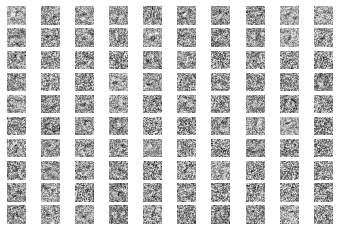

In [16]:
# To see what the network has learned, we can visualize the weights of the hidden
# layer. The following code allows us to obtain them:
weights = model.layers[0].get_weights()

# To do this, we'll reshape the weights for each neuron back to a 28x28 two-dimensional array:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy

fig = plt.figure()
w = weights[0].T

for neuron in range(hidden_neurons):
    ax = fig.add_subplot(10, 10, neuron + 1)
    ax.axis("off")
    ax.imshow(numpy.reshape(w[neuron], (28, 28)), cmap=cm.Greys_r)

plt.savefig("neuron_images.png", dpi=300)
plt.show()

# 6. A coding example of convolution operation from scratch

<Response [200]>


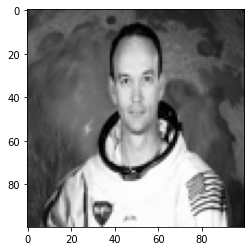

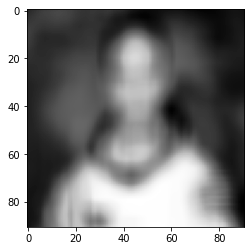

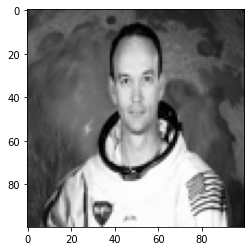

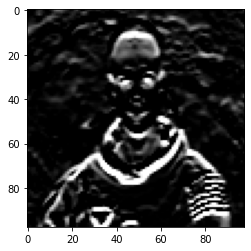

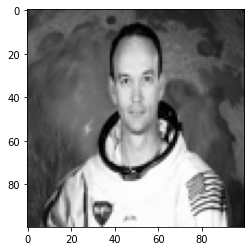

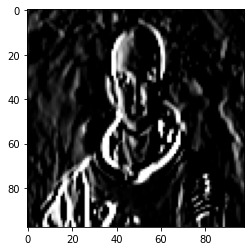

In [17]:
import numpy as np


def conv(image, im_filter):
    """
    :param image: grayscale image as a 2-dimensional numpy array
    :param im_filter: 2-dimensional numpy array
    """

    # input dimensions
    height = image.shape[0]
    width = image.shape[1]

    # output image with reduced dimensions
    im_c = np.zeros((height - len(im_filter) + 1, width - len(im_filter) + 1))

    # iterate over all rows and columns
    for row in range(len(im_c)):
        for col in range(len(im_c[0])):
            # apply the filter
            for i in range(len(im_filter)):
                for j in range(len(im_filter[0])):
                    im_c[row, col] += image[row + i, col + j] * im_filter[i][j]

    # fix out-of-bounds values
    im_c[im_c > 255] = 255
    im_c[im_c < 0] = 0

    # plot images for comparison
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm

    plt.figure()
    plt.imshow(image, cmap=cm.Greys_r)
    plt.show()

    plt.imshow(im_c, cmap=cm.Greys_r)
    plt.show()


import requests
from PIL import Image
from io import BytesIO

# load the image
url = "https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1240w,f_auto,q_auto:best/rockcms/2021-04/210428-michael-collins-mb-1737-b9ac18.jpg"
resp = requests.get(url)
print(resp)

image_rgb = np.asarray(Image.open(BytesIO(resp.content)).resize((100, 100)).convert("RGB"))

# convert to grayscale
image_grayscale = np.mean(image_rgb, axis=2, dtype=np.uint)

# blur filter
blur = np.full([10, 10], 1. / 100)
conv(image_grayscale, blur)

# sobel filters
sobel_x = [[-1, -2, -1],
            [0, 0, 0],
            [1, 2, 1]]
conv(image_grayscale, sobel_x)

sobel_y = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
conv(image_grayscale, sobel_y)

# 7. Classifying handwritten digits with a covnet using Keras

In [18]:
# for reproducibility
from numpy.random import seed

seed(1)

# In Tensoflow2 there is no need to perform
#from tensorflow import set_random_seed
#set_random_seed(1)
import tensorflow
tensorflow.random.set_seed(1)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Flatten

from keras.utils import np_utils

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

model = Sequential([
    Convolution2D(filters=32,
                  kernel_size=(3, 3),
                  input_shape=(28, 28, 1)),  # first conv layer
    Activation('relu'),
    Convolution2D(filters=32,
                  kernel_size=(3, 3)),  # second conv layer
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),  # max pooling layer
    Flatten(),  # flatten the output tensor
    Dense(64),  # fully-connected hidden layer
    Activation('relu'),
    Dense(10),  # output layer
    Activation('softmax')])

print(model.summary())

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adadelta')

model.fit(X_train, Y_train, batch_size=100, epochs=3, validation_split=0.1, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=1)

print('\nTest accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_10 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_11 (Activation)  (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                      

## Improving the performance of CNNS

### Data pre-processing
- Feature scaling:
- Standard score:

### Regularization
To reduce overfitting
- Weight decay
- Dropout
- Data augmentation
    - Rotation
    - Horizontal and vertical flip
    - Zoom in/out
    - Crop
    - Skew
    - Contrast and brightness adjustment

## 8. A CNN example with Keras and CIFAR-10 (with data augmentation)

#### About activation functions:
#### https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/#:~:text=for%20Output%20Layers-,Activation%20Functions,a%20layer%20of%20the%20network.
#### https://en.wikipedia.org/wiki/Activation_function

In [1]:
import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

batch_size = 50

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Newer versions of keras==2.4.0 and tensorflow==2.3.0 would work as follows.
# Import:
# from keras.utils import np_utils
# or
# from keras import utils as np_utils
# and then replace keras.utils.to_categorical with
# keras.utils.np_utils.to_categorical

#Y_train = keras.utils.to_categorical(Y_train, 10)
#Y_test = keras.utils.to_categorical(Y_test, 10)
from keras.utils import np_utils
Y_train = keras.utils.np_utils.to_categorical(Y_train, 10)
Y_test = keras.utils.np_utils.to_categorical(Y_test, 10)

# Perform data augmentation
data_generator = ImageDataGenerator(rotation_range=90,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    horizontal_flip=True)

data_generator.fit(X_train)

# standardize the test set
for i in range(len(X_test)):
    X_test[i] = data_generator.standardize(X_test[i])

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit_generator(
    generator=data_generator.flow(x=X_train,
                                  y=Y_train,
                                  batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=5,
    validation_data=(X_test, Y_test),
    workers=4)

170508288/170498071 [==============================] - 2s 0us/step
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


1000/1000 [==============================] - 71s 60ms/step - loss: 2.1770 - accuracy: 0.3242 - val_loss: 1.6193 - val_accuracy: 0.4283
Epoch 2/5
1000/1000 [==============================] - 59s 59ms/step - loss: 1.5986 - accuracy: 0.4406 - val_loss: 1.4479 - val_accuracy: 0.5089
Epoch 3/5
1000/1000 [==============================] - 59s 59ms/step - loss: 1.3855 - accuracy: 0.5064 - val_loss: 1.2619 - val_accuracy: 0.5588
Epoch 4/5
1000/1000 [==============================] - 59s 59ms/step - loss: 1.2532 - accuracy: 0.5544 - val_loss: 1.5413 - val_accuracy: 0.5208
Epoch 5/5
1000/1000 [==============================] - 60s 60ms/step - loss: 1.1654 - accuracy: 0.5881 - val_loss: 1.2523 - val_accuracy: 0.5755


In [2]:
score = model.evaluate(X_test, Y_test, verbose=1)

print('\nTest accuracy:', score[1])

313/313 [==============================] - 3s 10ms/step - loss: 1.2523 - accuracy: 0.5755

Test accuracy: 0.5755000114440918


Depending on the number of epochs, this model will produce the following results:
47% accuracy in 3 epochs
59% accuracy in 5 epochs
80% accuracy in about 100 epochs— significantly better than before, but still not
perfect

# 9. Transfer learning example with PyTorch

## What is Transfer learning?

##### Transfer learning is the process of applying an existing trained ML model to a new, but related, problem. For example, we can take a network trained on ImageNet and repurpose it to classify grocery store items. Alternatively, we could use a driving simulator game to train a neural network to drive a simulated car, and then use the network to drive a real car (but don't try this at home!). Transfer learning is a general ML concept, applicable to all ML algorithms

<img src="https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" />

There are 2 options:
1. Use the original part of the network as feature extractor and only train the new layer (Fully connected layers)
2. Fine-tuning the whole network: It is possible to update all
network weights, but we can also lock some of the weights in the first layers. The
idea here is that the initial layers detect general features – not related to a specific
task – and it makes sense to reuse them.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import models, transforms

batch_size = 50

# training data
train_data_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_set = torchvision.datasets.CIFAR10(root='./data',
                                         train=True,
                                         download=True,
                                         transform=train_data_transform)

train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=2)

# validation data
val_data_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_set = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=val_data_transform)

val_order = torch.utils.data.DataLoader(val_set,
                                        batch_size=batch_size,
                                        shuffle=False,
                                        num_workers=2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the training of the model. Unlike Keras, in PyTorch we have to iterate
# over the training data manually. This method iterates once over the whole
# training set (one epoch) and applies the optimizer after each forward pass:
def train_model(model, loss_function, optimizer, data_loader):
    # set model to training mode
    model.train()

    current_loss = 0.0
    current_acc = 0

    # iterate over the training data
    for i, (inputs, labels) in enumerate(data_loader):
        # send the input/labels to the GPU
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            # forward
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)
            loss = loss_function(outputs, labels)

            # backward
            loss.backward()
            optimizer.step()

        # statistics
        current_loss += loss.item() * inputs.size(0)
        current_acc += torch.sum(predictions == labels.data)

    total_loss = current_loss / len(data_loader.dataset)
    total_acc = current_acc.double() / len(data_loader.dataset)

    print('Train Loss: {:.4f}; Accuracy: {:.4f}'.format(total_loss, total_acc))

def test_model(model, loss_function, data_loader):
    # set model in evaluation mode
    model.eval()

    current_loss = 0.0
    current_acc = 0

    # iterate over  the validation data
    for i, (inputs, labels) in enumerate(data_loader):
        # send the input/labels to the GPU
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward
        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)
            loss = loss_function(outputs, labels)

        # statistics
        current_loss += loss.item() * inputs.size(0)
        current_acc += torch.sum(predictions == labels.data)

    total_loss = current_loss / len(data_loader.dataset)
    total_acc = current_acc.double() / len(data_loader.dataset)

    print('Test Loss: {:.4f}; Accuracy: {:.4f}'.format(total_loss, total_acc))

# Use the original part of the network as feature extractor and only train the new layer (Fully connected layers)
def tl_feature_extractor(epochs=3):
    # load the pre-trained model
    model = torchvision.models.resnet18(pretrained=True)

    # exclude existing parameters from backward pass
    # for performance
    for param in model.parameters():
        param.requires_grad = False

    # newly constructed layers have requires_grad=True by default
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, 10)

    # transfer to GPU (if available)
    model = model.to(device)

    loss_function = nn.CrossEntropyLoss()

    # only parameters of the final layer are being optimized
    optimizer = optim.Adam(model.fc.parameters())

    # train
    for epoch in range(epochs):
        print('Epoch {}/{}'.format(epoch + 1, epochs))

        train_model(model, loss_function, optimizer, train_loader)
        test_model(model, loss_function, val_order)

# Fine-tuning the whole network
def tl_fine_tuning(epochs=3):
    # load the pre-trained model
    model = models.resnet18(pretrained=True)

    # replace the last layer
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, 10)

    # transfer the model to the GPU
    model = model.to(device)

    # loss function
    loss_function = nn.CrossEntropyLoss()

    # We'll optimize all parameters
    optimizer = optim.Adam(model.parameters())

    # train
    for epoch in range(epochs):
        print('Epoch {}/{}'.format(epoch + 1, epochs))

        train_model(model, loss_function, optimizer, train_loader)
        test_model(model, loss_function, val_order)


if __name__ == '__main__':
    
    tl_feature_extractor(epochs=5)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Epoch 1/5
Train Loss: 1.0477; Accuracy: 0.6419
Test Loss: 0.7361; Accuracy: 0.7498
Epoch 2/5
Train Loss: 0.8560; Accuracy: 0.7024
Test Loss: 0.7177; Accuracy: 0.7496
Epoch 3/5
Train Loss: 0.8316; Accuracy: 0.7081
Test Loss: 0.6906; Accuracy: 0.7647
Epoch 4/5
Train Loss: 0.8148; Accuracy: 0.7131
Test Loss: 0.6987; Accuracy: 0.7598
Epoch 5/5
Train Loss: 0.8092; Accuracy: 0.7156
Test Loss: 0.6633; Accuracy: 0.7730


In [4]:
tl_fine_tuning(epochs=2)

Epoch 1/2
Train Loss: 0.8105; Accuracy: 0.7146
Test Loss: 0.7027; Accuracy: 0.7612
Epoch 2/2
Train Loss: 0.5261; Accuracy: 0.8183
Test Loss: 0.5418; Accuracy: 0.8126
